In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 

# Solutions to the Penguins exercises

This notebook contains the full solutions to the Penguins exercises in C3.

As a change from (astro)physics data, today we're going to be looking at penguins. 

```{image} ./images/Emperor_Penguin_Manchot_empereur.jpg
:alt: a penguin
:width: 800px
:align: center
```

To get started, download the [palmerpenguins dataset](./data/penguins_raw.csv) and save it in the folder you're using for this weeks work. **Remember**, keeping all your data files and notebooks in one place saves you the hassle of messing about with paths every time. 

Throughout these exercises you should be **writing what you are doing and why you're doing it** in the markdown cells alongside your code. I know I keep saying this, but it is important. Could I be giving you a clue to what I'm expecting you to do for your coursework? You could say that, but I couldn't possibly comment.

```{admonition} Where does this data come from?
:class: myinfo 
If you want to know more about where the dataset we're using here comes from, you can check the [palmerpenguins website](https://allisonhorst.github.io/palmerpenguins/index.html)
```

```{admonition} Exercise: Read in your data
:class: practice

First things first. Read the palmerpenguins [penguins_raw.csv](../data/penguins_raw.csv) file into a dataframe. 

Check what it looks like. Do the columns have sensible names? If not, change them. 

Check to see if there are any `NaN` values. **Hint:** There is one column that might have a lot of `NaN`s. We don't necessarily want to get rid of rows that have `NaN`s only in that column. Look at your dataframe and check which column this is. Should we do anything about it?
```

# Solution: Read in your data


In [3]:
penguins_df = pd.read_csv('./data/penguins_raw.csv')

In [4]:
penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [5]:
penguins_df[penguins_df.isna().any(axis=1)]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,PAL0910,62,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N96A2,Yes,2009-11-27,46.8,16.5,189.0,3650.0,FEMALE,9.65061,-24.48153,NaN
338,PAL0910,63,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A1,Yes,2009-11-19,45.7,17.0,195.0,3650.0,FEMALE,9.26715,-24.31912,NaN
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


That's a lot of `NaN`s. But it looks like most of them are in the `Comments` column. We can leave that as it is then.

```{admonition} Exercise: Penguins love histograms
:class: practice

It's time to make some more histograms!

Make a histogram showing the distribution of body mass for our penguins.

Your dataframe should have a column called `Species`. Use the `unique()` function on that column to get a list of the different species of penguins in the data. Create a new plot with histograms of body mass for each species of penguin. As always, give your plot sensible axis labels, units, a legend, and experiment to find a good bin size so that the histograms can be compared fairly. 

**Hint:** `unique()` works similarly to the `min()` and `max()` functions we used in the [previous section](03_working_with_data.ipynb). 
```

# Solution: Penguins love histograms

First making a histogram of body masses:

In [6]:
penguins_df['Body Mass (g)'].max()

6300.0

In [7]:
penguins_df['Body Mass (g)'].min()

2700.0

In [8]:
penguins_df['Body Mass (g)'].max() - penguins_df['Body Mass (g)'].min()

3600.0

Range in mass is 3600g. 36 bins would be bins of 100g. Sounds reasonable.

Text(0, 0.5, 'Count')

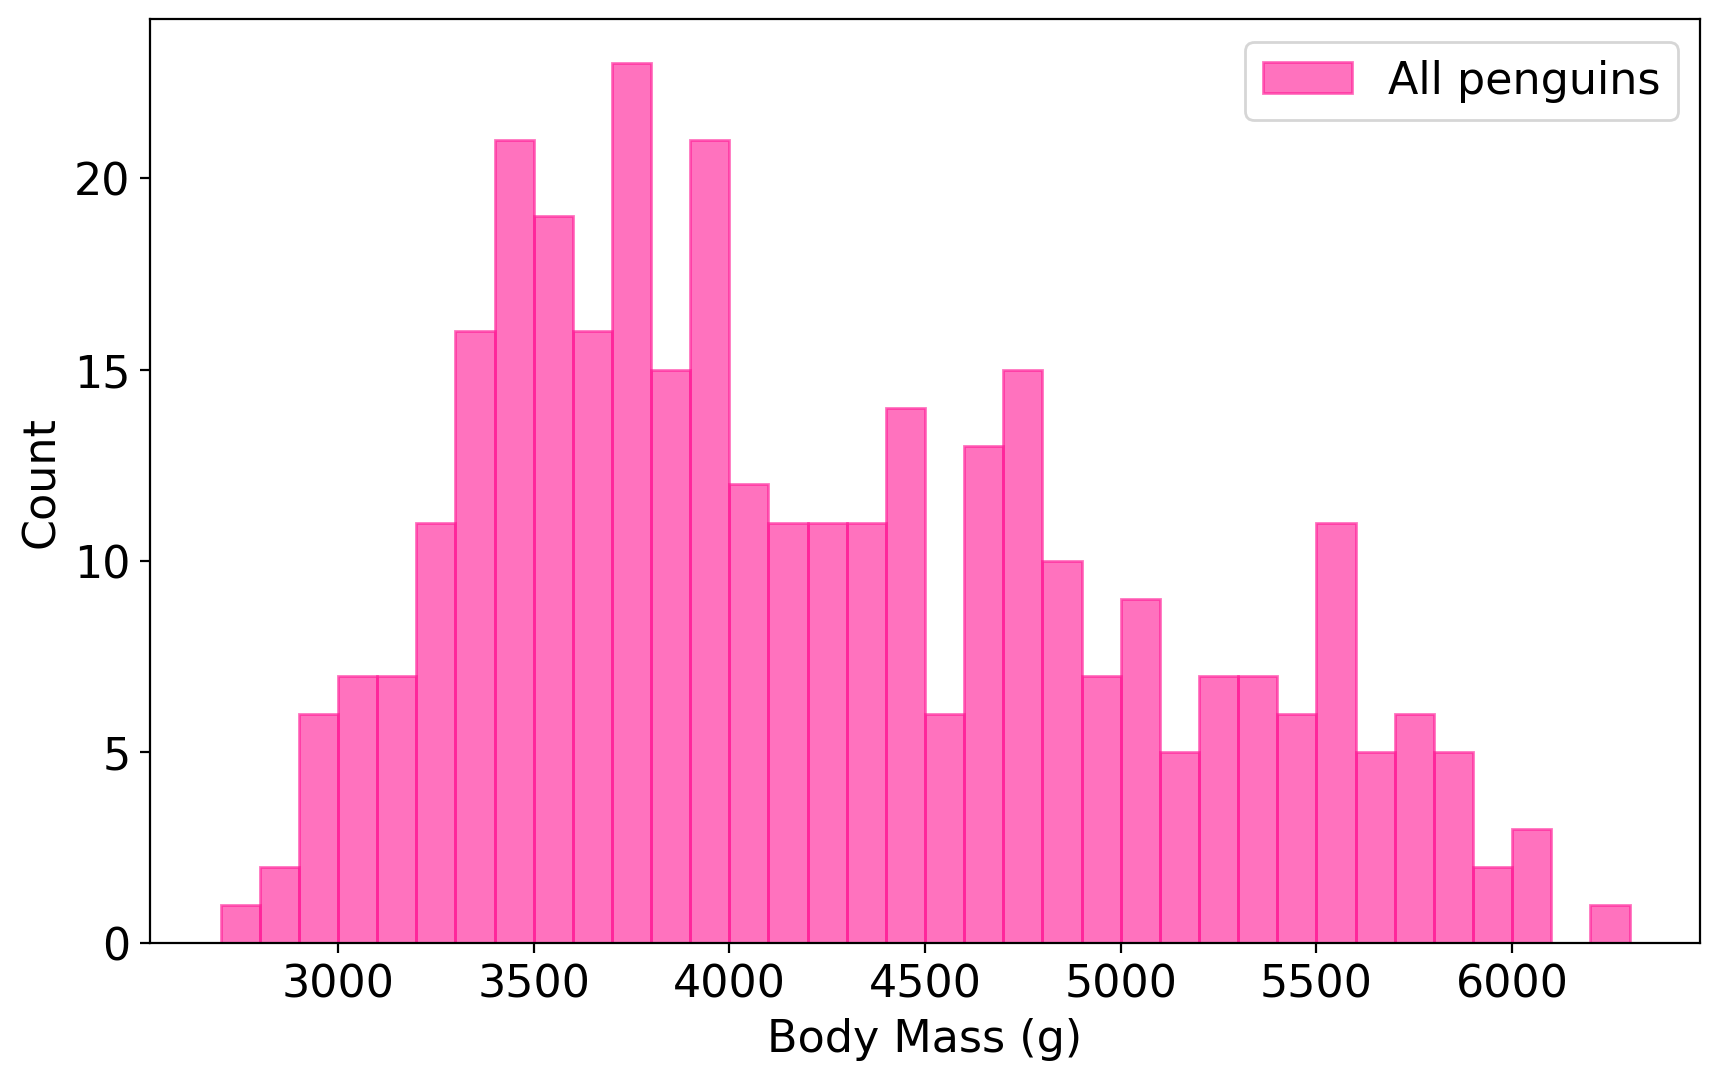

In [9]:
penguin_hist_1 = plt.figure(figsize=(10,6))
ax = penguin_hist_1.add_subplot(1,1,1)
ax.hist(penguins_df['Body Mass (g)'], bins=36, label='All penguins', alpha=0.6, color='DeepPink', edgecolor='DeepPink')
ax.legend()
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Count')


Now we want to look at the body mass distributions for the different species. First we need to check what species are in the table by looking at the unique values in the `Species` column

In [10]:
penguins_df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

There's a couple of ways to approach this. We could use the `group_by()` function in `pandas` to create some quick plots. Here we'll just use `where()`.

You could put all the `where()` stuff every time you plot a histogram, but that makes things quite messy. To make it easier to see what's going on, I've made three new dataframes, one for each species of penguin:

In [11]:

adelie = penguins_df.where(penguins_df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)')
gentoo = penguins_df.where(penguins_df['Species'] == 'Gentoo penguin (Pygoscelis papua)')
chinstrap = penguins_df.where(penguins_df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)')



Setting the same **number** of bins won't be a fair comparison here. Need to have the exact same bins. Reducing number of bins to 18 as each one will have fewer penguins in it. I'm using the minumum and maximum values of mass for *all* the penguins, so the bins are the same for all of them. 

Remember, when we do this we're setting up an array of bin edges, so you need the last number in `np.linspace()` needs to be `nbins + 1`:


In [12]:
bins = np.linspace(penguins_df['Body Mass (g)'].min(),penguins_df['Body Mass (g)'].max(), 19)



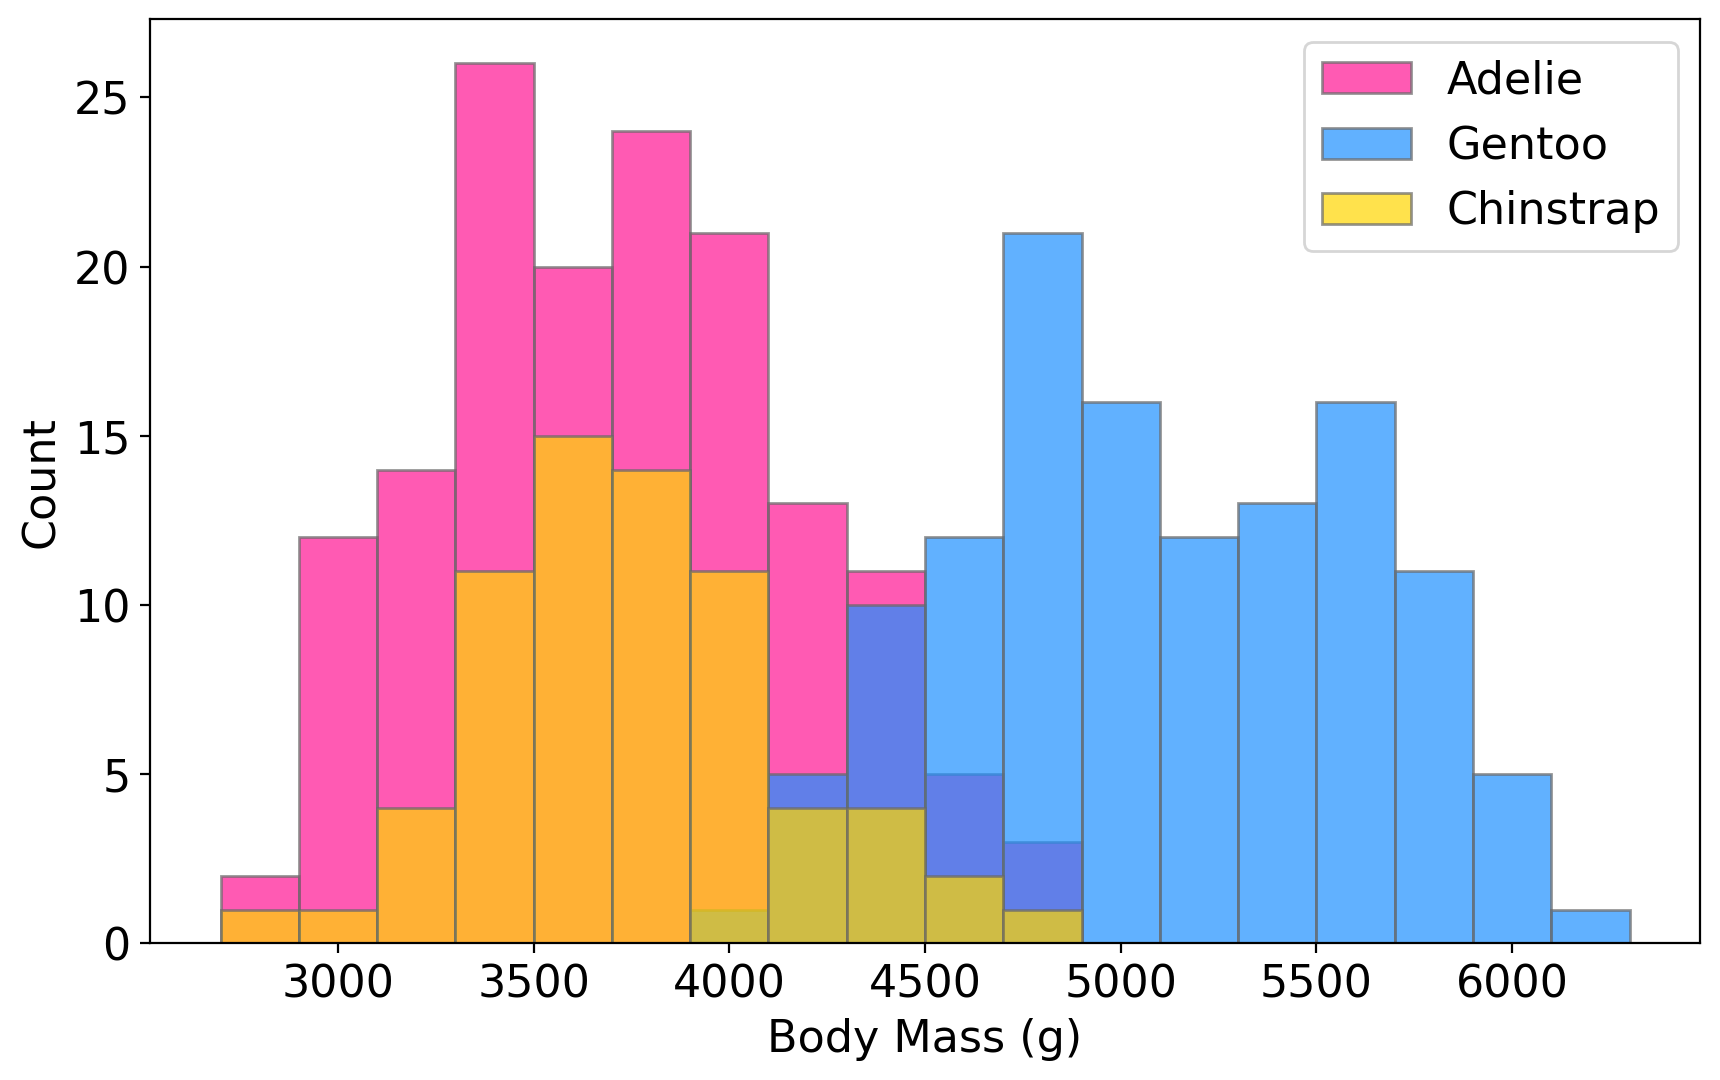

In [14]:
penguin_hist_2 = plt.figure(figsize=(10,6))
ax = penguin_hist_2.add_subplot(1,1,1)

ax.hist(adelie['Body Mass (g)'], label='Adelie', bins=bins, alpha=0.7, color='DeepPink', edgecolor='DimGrey')
ax.hist(gentoo['Body Mass (g)'], label='Gentoo', bins=bins, alpha=0.7, color='DodgerBlue', edgecolor='DimGrey')
ax.hist(chinstrap['Body Mass (g)'], label='Chinstrap', bins=bins, alpha=0.7, color='Gold', edgecolor='DimGrey')

ax.legend()
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Count')
plt.show()


```{admonition} Exercise: What a big bill you have?
:class: practice

I would like to apologise in advance too all of the penguin enthusiats and/or NatSci students who most likely know a lot more about penguins and biology than I do... 

After some googling, I have discovered that the "culmen" is the ridge on top of a penguin's bill. We shall now investigate whether there is a relation between the size of a penguin's bill and its flipper size. Perhaps there is a relation? Perhaps there is not. There's only one way to find out.

 - Plot culmen length and depth as a function of body mass for each species of penguin. 
 - Plot flipper length as a function of body mass for each species of penguin.
 - Assume that a penguin's beak can be approximated as a cylinder of length equal to the culmen length and radius equal to half of the culmen depth. Add a new column to your dataframe corresponding to the volume of the penguins beak.
 - Plot beak volume as a function of body mass for each species. Define a function to relate the two and find the best fit relation. Do heavier penguins have larger beaks?

```


# Solution: What a big bill you have?

First make the plots - culmen length and depth as a function of body mass for each species of penguin.

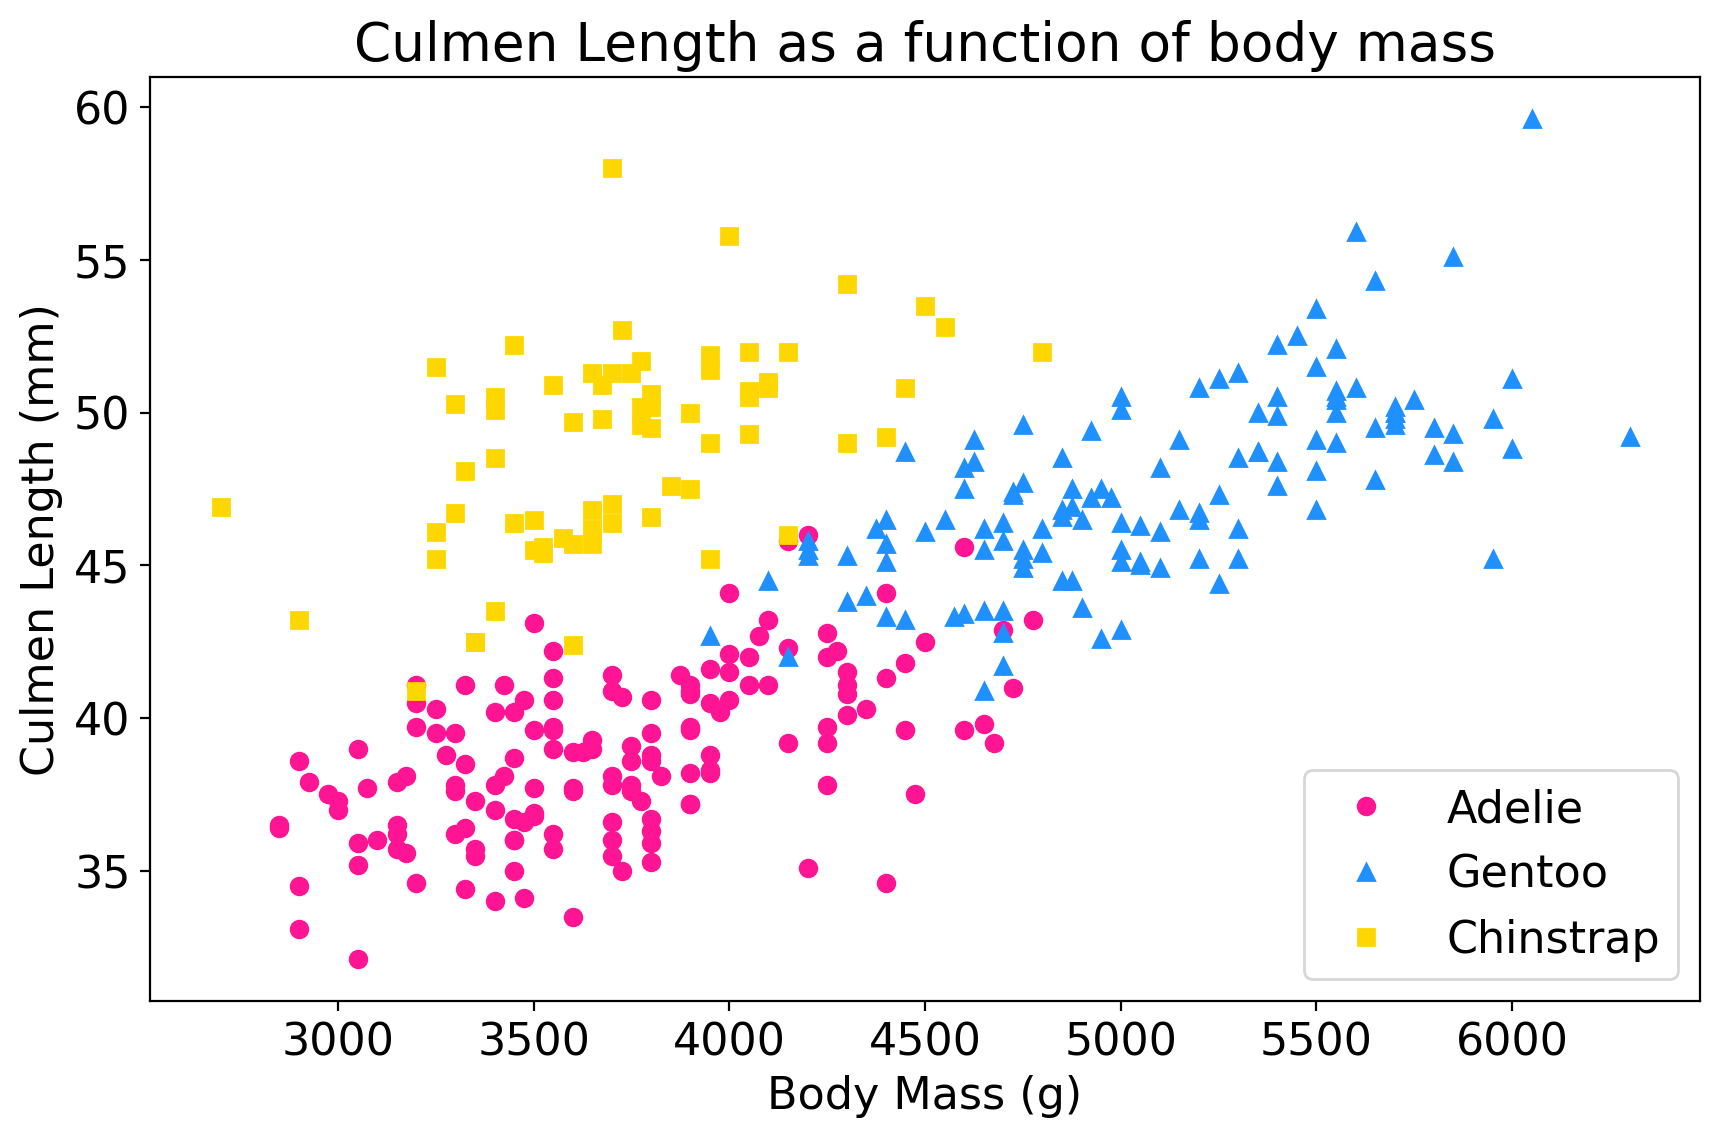

In [15]:
cul_length =  plt.figure(figsize=(10,6))
ax = cul_length.add_subplot(1,1,1)

ax.plot(adelie['Body Mass (g)'], adelie['Culmen Length (mm)'], marker='o', ls='None', color='DeepPink',label='Adelie')
ax.plot(gentoo['Body Mass (g)'], gentoo['Culmen Length (mm)'], marker='^', ls='None', color='DodgerBlue',label='Gentoo')
ax.plot(chinstrap['Body Mass (g)'], chinstrap['Culmen Length (mm)'], marker='s', ls='None', color='Gold',label='Chinstrap')
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Culmen Length (mm)')
ax.legend()
ax.set_title('Culmen Length as a function of body mass')
plt.show()






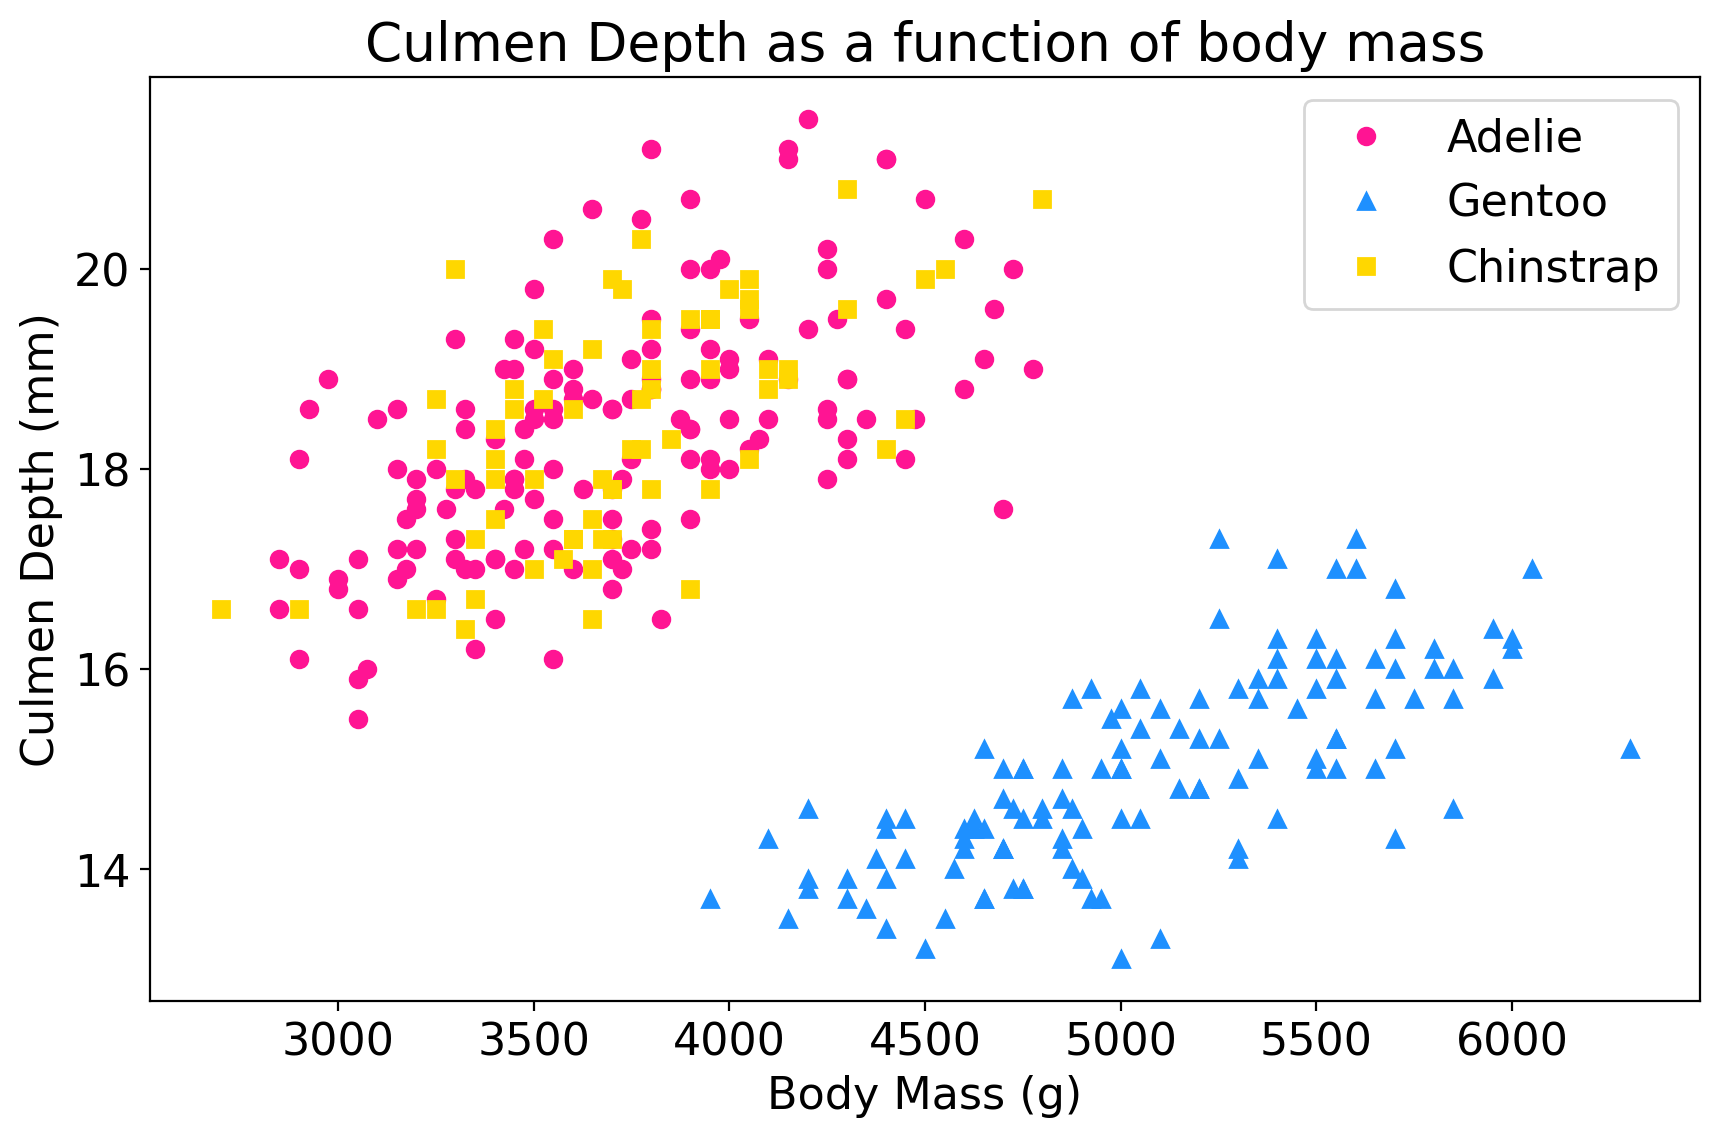

In [16]:
cul_depth =  plt.figure(figsize=(10,6))
ax = cul_depth.add_subplot(1,1,1)

ax.plot(adelie['Body Mass (g)'], adelie['Culmen Depth (mm)'], marker='o', ls='None', color='DeepPink',label='Adelie')
ax.plot(gentoo['Body Mass (g)'], gentoo['Culmen Depth (mm)'], marker='^', ls='None', color='DodgerBlue',label='Gentoo')
ax.plot(chinstrap['Body Mass (g)'], chinstrap['Culmen Depth (mm)'], marker='s', ls='None', color='Gold',label='Chinstrap')
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Culmen Depth (mm)')
ax.legend()
ax.set_title('Culmen Depth as a function of body mass')
plt.show()



I wasn't expecting the pink points to move like that. Interesting!

On to flipper length

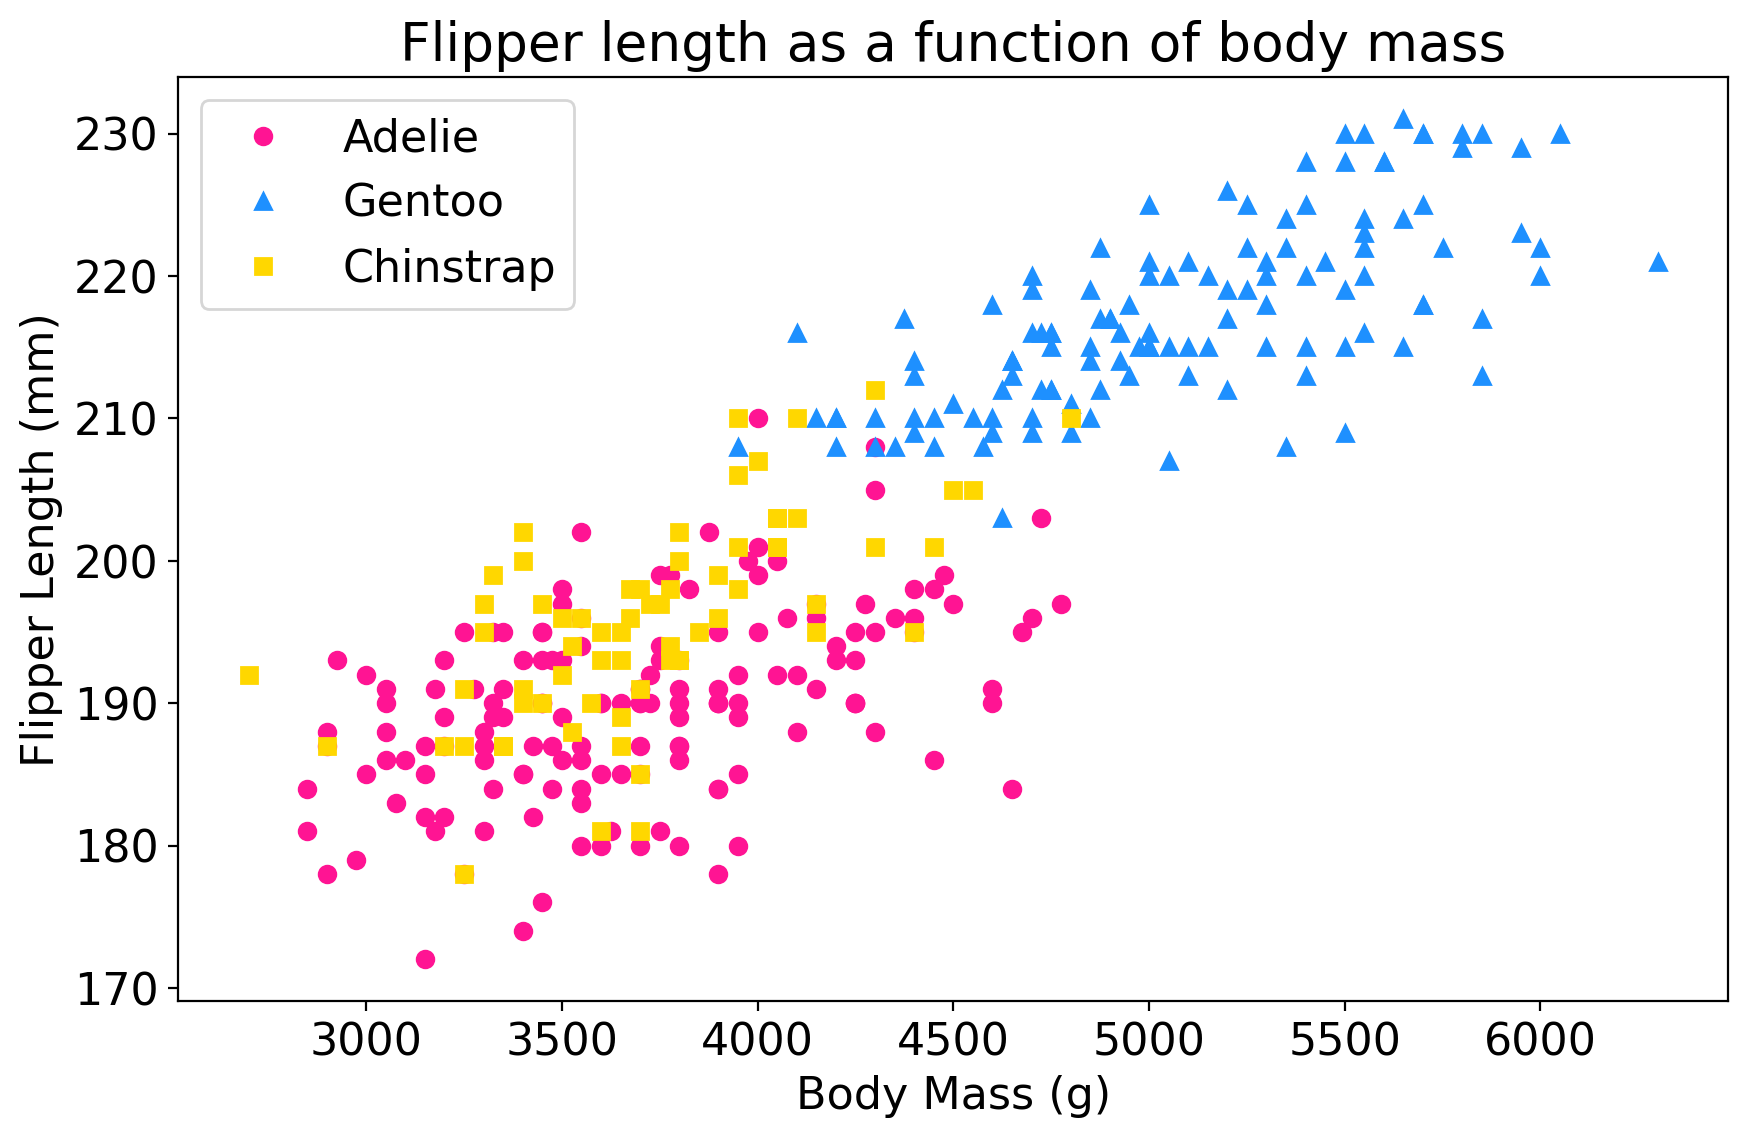

In [17]:
flipper_length =  plt.figure(figsize=(10,6))
ax = flipper_length.add_subplot(1,1,1)

ax.plot(adelie['Body Mass (g)'], adelie['Flipper Length (mm)'], marker='o', ls='None', color='DeepPink',label='Adelie')
ax.plot(gentoo['Body Mass (g)'], gentoo['Flipper Length (mm)'], marker='^', ls='None', color='DodgerBlue',label='Gentoo')
ax.plot(chinstrap['Body Mass (g)'], chinstrap['Flipper Length (mm)'], marker='s', ls='None', color='Gold',label='Chinstrap')
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.legend()
ax.set_title('Flipper length as a function of body mass')
plt.show()

Now we're onto approximating our penguins as cylinders - a common technique in physics (much like the [spherical cow](https://en.wikipedia.org/wiki/Spherical_cow)).

The volume of a cylinder is given by:

$$
V = \pi r^2 h
$$
where $r$ is the radius and $h$ is the height. Here we're defining $h$ as the culmen length and $r$ as half of the culmen depth. 

Remember the units on these columns though... Both of these measurements are in mm. Physicists like SI units, so lets also convert these to meters so our volume is in m$^3$ .

Now add the new column to our dataframe using this equation:

In [18]:
penguins_df['Beak_Volume'] = np.pi * penguins_df['Culmen Length (mm)']*1e-3 * (penguins_df['Culmen Depth (mm)']*1e-3)**2

In [19]:
penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Beak_Volume
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.,0.000043
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN,0.000038
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN,0.000041
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN,0.000043


Finally we can get onto the important science question. Do heavier penguins have bigger beaks?

Redoing the `where()` selection to get the new columns in my species dataframes. I also could have just run the volume calculation above on each on set individually too (or, even better, defined a function!).

In [20]:
adelie = penguins_df.where(penguins_df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)')
gentoo = penguins_df.where(penguins_df['Species'] == 'Gentoo penguin (Pygoscelis papua)')
chinstrap = penguins_df.where(penguins_df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)')

adelie.dropna(subset=['Body Mass (g)', 'Beak_Volume'], inplace=True)
gentoo.dropna(subset=['Body Mass (g)', 'Beak_Volume'], inplace=True)
chinstrap.dropna(subset=['Body Mass (g)', 'Beak_Volume'], inplace=True)



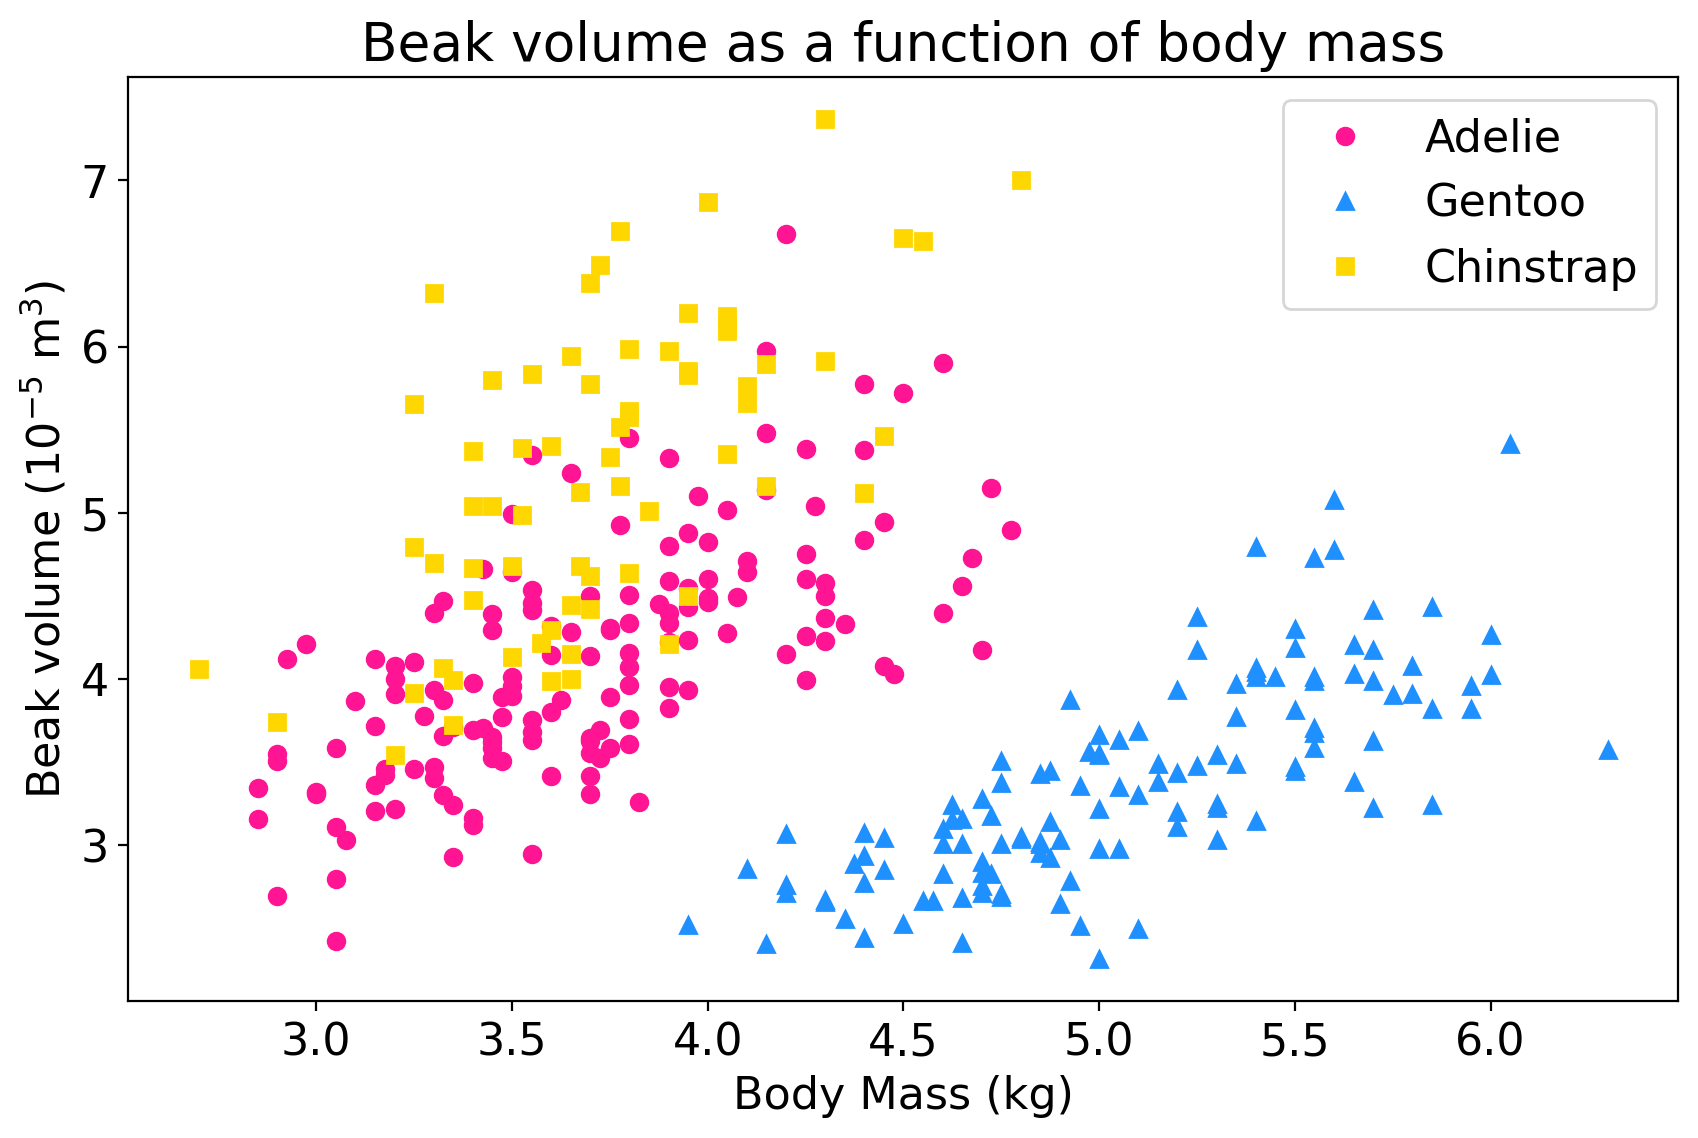

In [21]:
big_beaks =  plt.figure(figsize=(10,6))
ax = big_beaks.add_subplot(1,1,1)

ax.plot(adelie['Body Mass (g)']/1e3, adelie['Beak_Volume']/1e-5, marker='o', ls='None', color='DeepPink',label='Adelie')
ax.plot(gentoo['Body Mass (g)']/1e3, gentoo['Beak_Volume']/1e-5, marker='^', ls='None', color='DodgerBlue',label='Gentoo')
ax.plot(chinstrap['Body Mass (g)']/1e3, chinstrap['Beak_Volume']/1e-5, marker='s', ls='None', color='Gold',label='Chinstrap')
ax.set_xlabel('Body Mass (kg)')
ax.set_ylabel('Beak volume (10$^{-5}$ m$^3$)')
ax.legend()
ax.set_title('Beak volume as a function of body mass')
plt.show()




Now on to the last bit. Fitting the relation between beak volume and body mass:

In [22]:
def beak_vol_mass(x, m, c):
    y = m*x + c
    return(y)

In [23]:
popt, pcov = curve_fit(beak_vol_mass, adelie['Body Mass (g)'], adelie['Beak_Volume'])
adelie_slope = popt[0]
adelie_intercept = popt[1]
adelie_slope_err = pcov[0][0]
adelie_intercept_err = pcov[1][1]

print(adelie_slope, adelie_intercept)

1.0222278191160835e-08 3.513754299656589e-06


In [24]:
popt, pcov = curve_fit(beak_vol_mass, gentoo['Body Mass (g)'], gentoo['Beak_Volume'])
gentoo_slope = popt[0]
gentoo_intercept = popt[1]
gentoo_slope_err = pcov[0][0]
gentoo_intercept_err = pcov[1][1]

In [25]:
popt, pcov = curve_fit(beak_vol_mass, chinstrap['Body Mass (g)'], chinstrap['Beak_Volume'])
chinstrap_slope = popt[0]
chinstrap_intercept = popt[1]
chinstrap_slope_err = pcov[0][0]
chinstrap_intercept_err = pcov[1][1]

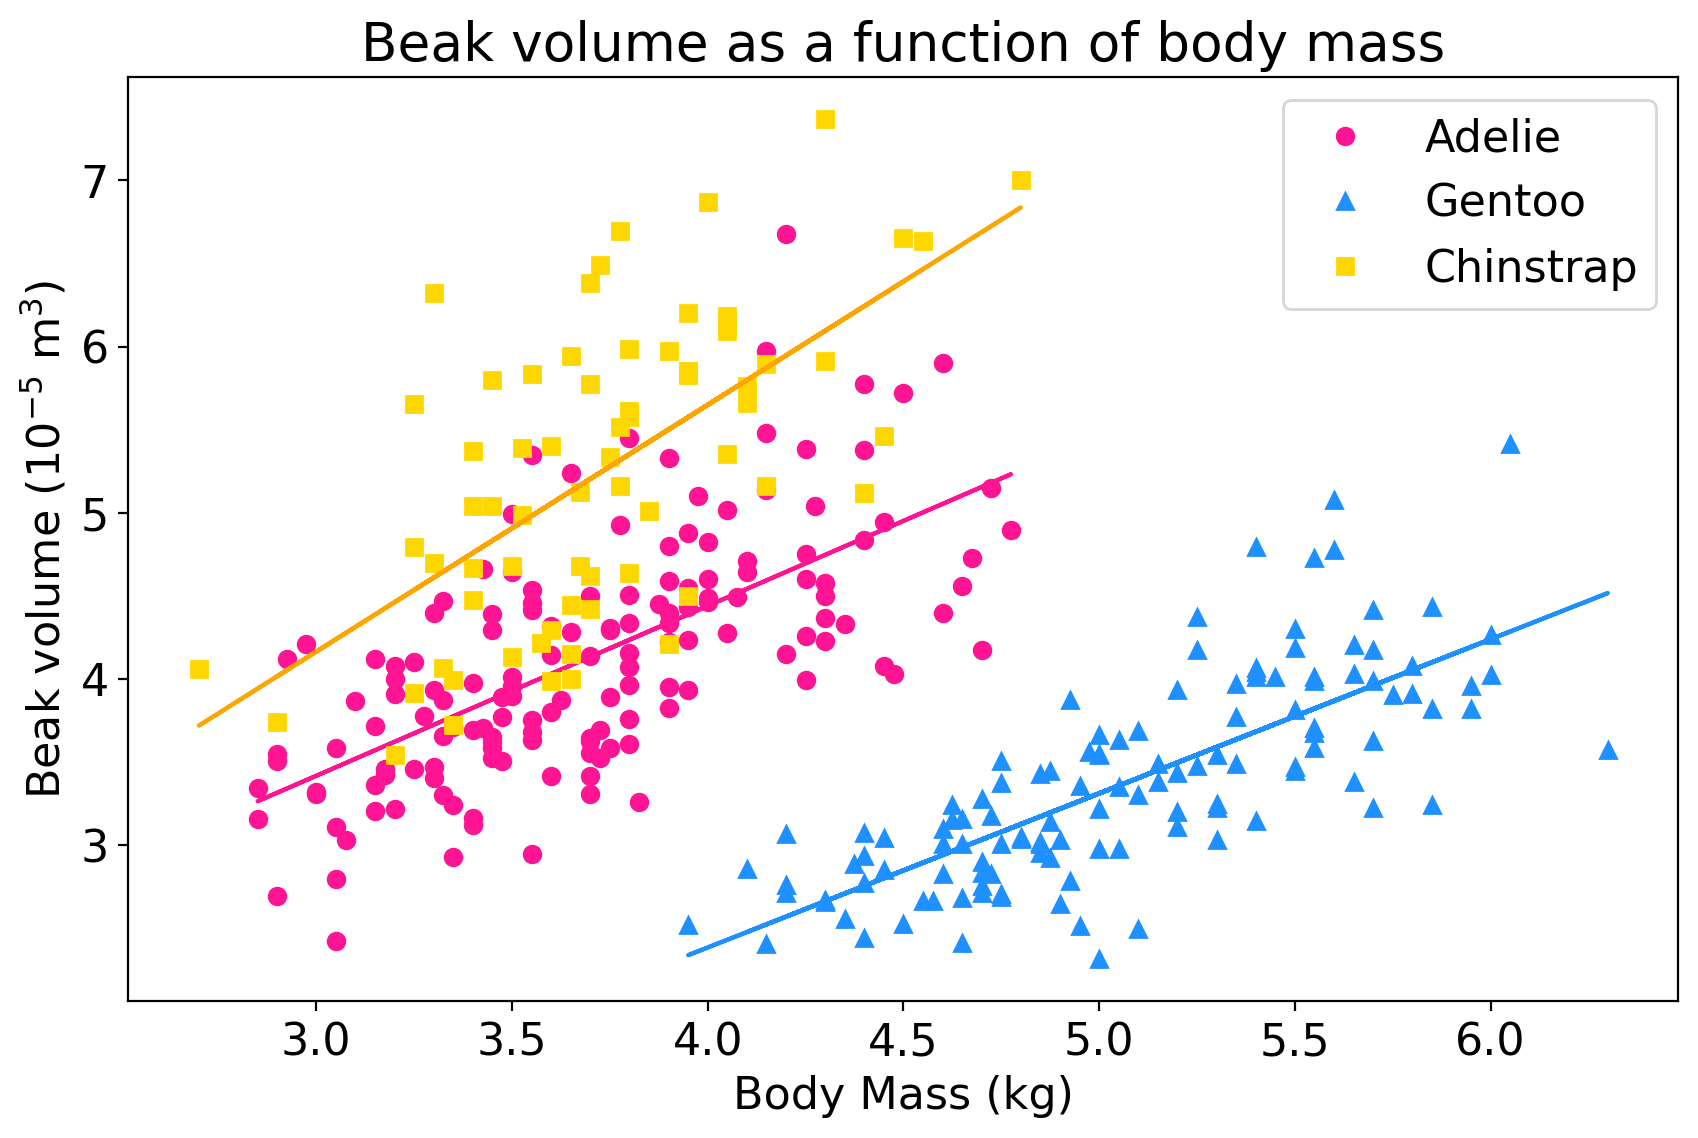

In [27]:
big_beaks =  plt.figure(figsize=(10,6))
ax = big_beaks.add_subplot(1,1,1)


ax.plot(adelie['Body Mass (g)']/1e3, adelie['Beak_Volume']/1e-5, marker='o', ls='None', color='DeepPink',label='Adelie')
ax.plot(adelie['Body Mass (g)']/1e3, beak_vol_mass(adelie['Body Mass (g)'], adelie_slope, adelie_intercept)/1e-5, ls='-', color='DeepPink')

ax.plot(gentoo['Body Mass (g)']/1e3, gentoo['Beak_Volume']/1e-5, marker='^', ls='None', color='DodgerBlue',label='Gentoo')
ax.plot(gentoo['Body Mass (g)']/1e3, beak_vol_mass(gentoo['Body Mass (g)'], gentoo_slope, gentoo_intercept)/1e-5, ls='-', color='DodgerBlue')

ax.plot(chinstrap['Body Mass (g)']/1e3, chinstrap['Beak_Volume']/1e-5, marker='s', ls='None', color='Gold',label='Chinstrap')
ax.plot(chinstrap['Body Mass (g)']/1e3, beak_vol_mass(chinstrap['Body Mass (g)'], chinstrap_slope, chinstrap_intercept)/1e-5, ls='-', color='Orange')


ax.set_xlabel('Body Mass (kg)')
ax.set_ylabel('Beak volume (10$^{-5}$ m$^3$)')
ax.legend()
ax.set_title('Beak volume as a function of body mass')
plt.show()
big_beaks.savefig('big_beaks.png', dpi=200)




Although beak volume increases with body mass for each of the species, the lower mass penguins (Adelie and Chinstrap) actually have larger beaks!

I did start to write some logical reasoning here as to why this could be the case, but remembered I am an astronomer, not a biologist and [bad things happen](https://www.theguardian.com/australia-news/2020/mar/30/astrophysicist-gets-magnets-stuck-up-nose-while-inventing-coronavirus-device) when astronomers try to do science outside their field. So let's move on....